# 00 Init

## Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setting to use py files

In [2]:
import os

In [3]:
os.chdir('/content/drive/MyDrive/Minesweeper [RL]')

In [4]:
# check that os is in right directory
os.getcwd()

'/content/drive/MyDrive/Minesweeper [RL]'

In [5]:
! pip install codes

## Import py files

In [6]:
# baseline : Env, Agent
from codes.Agent.DQNAgentWithoutRules import *
from codes.Trainer.trainerWithValidShutDown import *
from codes.Environment.env5rewardWithoutDone import *

## Import Libraries

# 01 Info

## level dictionary

In [7]:
level = {'easy' : {'map_size':(9,9), 'n_mines' : 10},
         'medium' : {'map_size':(16,16), 'n_mines':40},
         'expert' : {'map_size':(16,30), 'n_mines':99}}

## HYPER PARAMETERS

In [8]:
# Environment settings
MEM_SIZE = 50000
MEM_SIZE_MIN = 1000

# Learning settings
BATCH_SIZE = 64
LEARNING_RATE = 0.01
LEARN_DECAY = 0.99975
LEARN_MIN = 0.001
DISCOUNT = 0.1

# Exploration settings
EPSILON = 0.95
EPSILON_DECAY = 0.999975
EPSILON_MIN = 0.01

# DQN settings
CONV_UNITS = 64
UPDATE_TARGET_EVERY = 5

# 02 Train, Valid

In [16]:
env = MinesweeperEnv(map_size=level['easy']['map_size'],
                     n_mines=level['easy']['n_mines'],
                     rewards={'win':1, 'lose':-1, 'progress':0.3, 'guess':-0.3, 'no_progress' : -0.5})
agent = Limited18DQNAgent(env=env, conv_units=CONV_UNITS)

## TRAIN_PARAMETERS

In [14]:
EPISODES = 200000
PRINT_INTERVAL = 100
TRAIN_RENDER = False

TRAIN_INTERVALS = ['every timestep', 'every episodes']
TRAIN_INTERVAL = TRAIN_INTERVALS[1]

VALID_SAMPLE = 1000
VALID_INTERVAL = 10

Episode: [50000/200], Median progress: 5.50, Median reward: -2.60, Win rate : 0.00, Epsilon: 0.84
Episode: [50000/300], Median progress: 6.00, Median reward: -2.25, Win rate : 0.00, Epsilon: 0.68
Episode: [50000/400], Median progress: 6.00, Median reward: -2.35, Win rate : 0.00, Epsilon: 0.53
Episode: [50000/500], Median progress: 6.00, Median reward: -2.15, Win rate : 0.00, Epsilon: 0.41
Episode: [50000/600], Median progress: 6.50, Median reward: -2.45, Win rate : 0.00, Epsilon: 0.30
Episode: [50000/700], Median progress: 6.00, Median reward: -1.90, Win rate : 0.00, Epsilon: 0.24
Episode: [50000/800], Median progress: 6.00, Median reward: -2.10, Win rate : 0.00, Epsilon: 0.17
Episode: [50000/900], Median progress: 6.00, Median reward: -1.90, Win rate : 0.00, Epsilon: 0.11
Episode: [50000/1000], Median progress: 9.00, Median reward: -1.90, Win rate : 0.00, Epsilon: 0.06
Episode: [50000/1100], Median progress: 5.50, Median reward: -1.60, Win rate : 0.00, Epsilon: 0.04
Episode: [50000/12

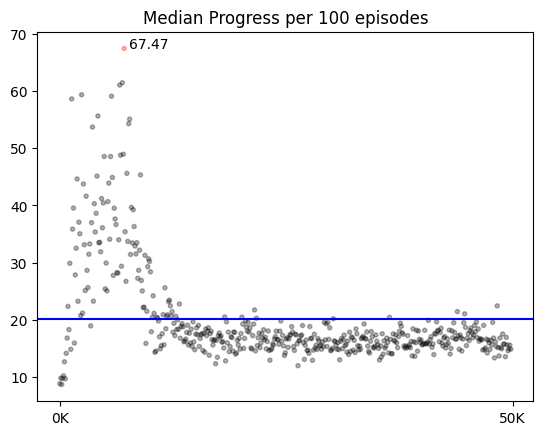

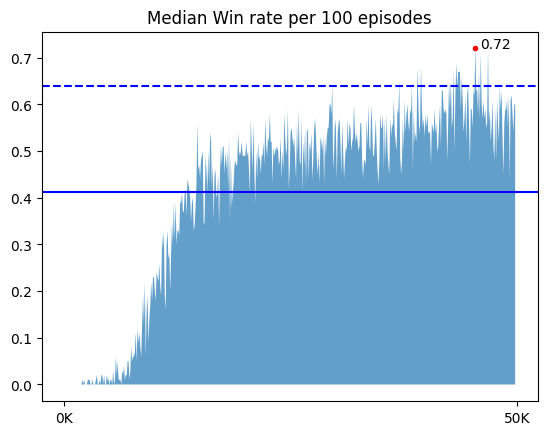

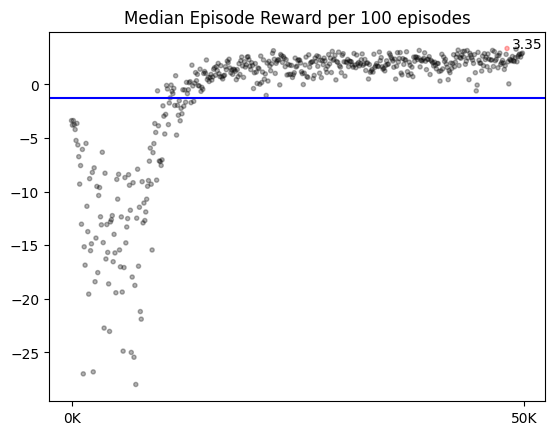

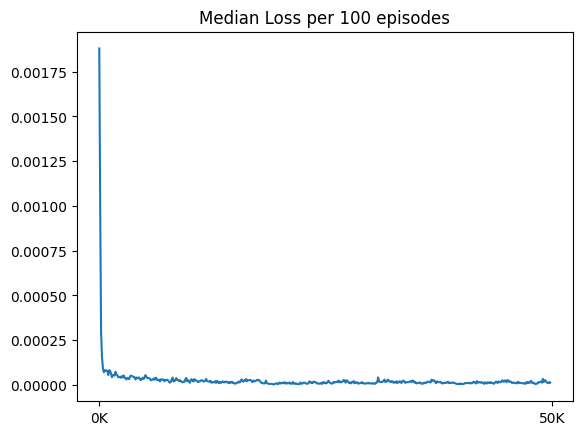

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/episodeInterval'가 생성되었습니다.
모델이 저장되었습니다.


In [17]:
train = Trainer(env, agent, 'episodeInterval')

In [18]:
with open('/content/drive/MyDrive/Minesweeper [RL]/models/episodeInterval/50K.pkl', 'wb') as f:
    pickle.dump(train, f)

Episode: [50000/100], Median progress: 16.00, Median reward: 3.60, Win rate : 0.57, Epsilon: 0.01
Episode: [50000/200], Median progress: 17.00, Median reward: 3.85, Win rate : 0.61, Epsilon: 0.01
Episode: [50000/300], Median progress: 14.00, Median reward: 2.55, Win rate : 0.54, Epsilon: 0.01
Episode: [50000/400], Median progress: 16.00, Median reward: 3.55, Win rate : 0.60, Epsilon: 0.01
Episode: [50000/500], Median progress: 14.00, Median reward: 2.60, Win rate : 0.61, Epsilon: 0.01
Episode: [50000/600], Median progress: 14.00, Median reward: 2.60, Win rate : 0.56, Epsilon: 0.01
Episode: [50000/700], Median progress: 17.00, Median reward: 3.50, Win rate : 0.61, Epsilon: 0.01
Episode: [50000/800], Median progress: 16.00, Median reward: 3.45, Win rate : 0.55, Epsilon: 0.01
Episode: [50000/900], Median progress: 16.00, Median reward: 3.80, Win rate : 0.67, Epsilon: 0.01
Episode: [50000/1000], Median progress: 14.00, Median reward: 3.30, Win rate : 0.57, Epsilon: 0.01
Episode: [50000/110

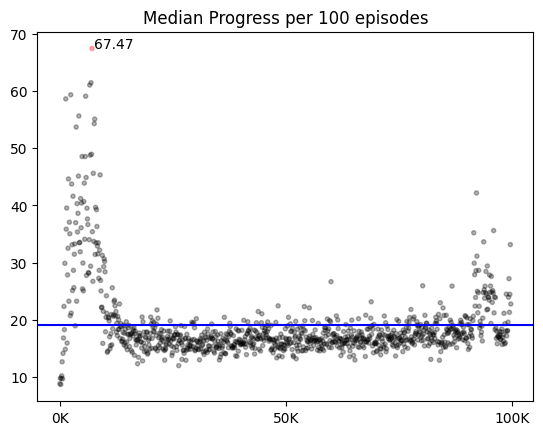

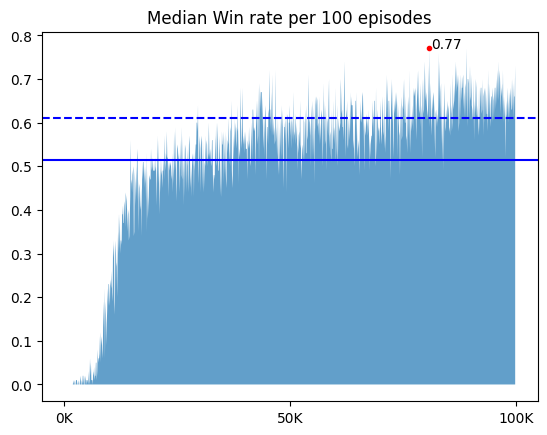

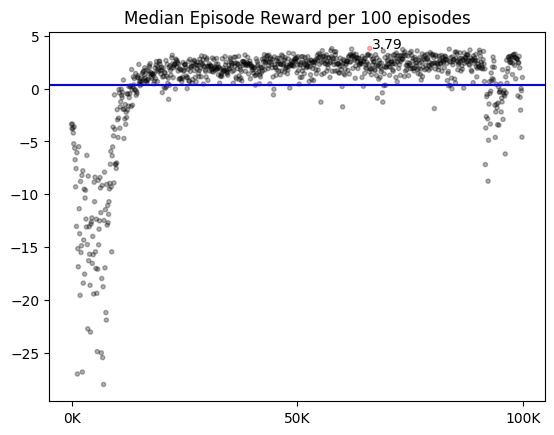

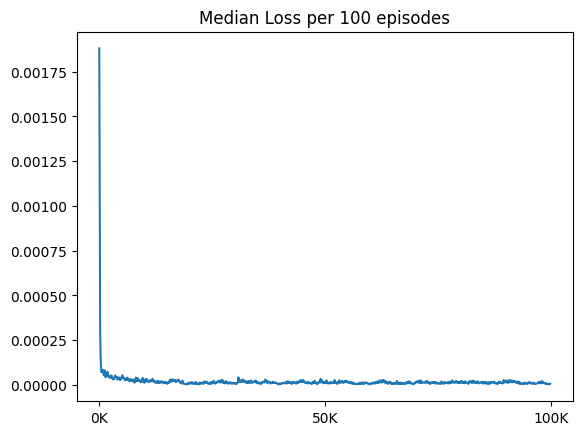

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/episodeInterval'는 이미 존재합니다.
모델이 저장되었습니다.


In [19]:
train.train()
train.visualize_train()
train.save_model()

In [20]:
with open('/content/drive/MyDrive/Minesweeper [RL]/models/episodeInterval/100K.pkl', 'wb') as f:
    pickle.dump(train, f)

In [ ]:
with open('/content/drive/MyDrive/Minesweeper [RL]/models/basicModelWithBiasWithoutRule/50K.pkl', 'rb') as f:
    t = pickle.load(f)

Episode: [50000/100], Median progress: 16.00, Median reward: 3.85, Win rate : 0.62, Epsilon: 0.01
Episode: [50000/200], Median progress: 13.50, Median reward: 2.20, Win rate : 0.54, Epsilon: 0.01
Episode: [50000/300], Median progress: 16.50, Median reward: 3.85, Win rate : 0.66, Epsilon: 0.01
Episode: [50000/400], Median progress: 17.00, Median reward: 4.05, Win rate : 0.64, Epsilon: 0.01
Episode: [50000/500], Median progress: 17.00, Median reward: 4.60, Win rate : 0.67, Epsilon: 0.01
Episode: [50000/600], Median progress: 16.00, Median reward: 4.00, Win rate : 0.67, Epsilon: 0.01
Episode: [50000/700], Median progress: 16.00, Median reward: 4.45, Win rate : 0.71, Epsilon: 0.01
Episode: [50000/800], Median progress: 14.00, Median reward: 3.40, Win rate : 0.58, Epsilon: 0.01
Episode: [50000/900], Median progress: 15.00, Median reward: 2.75, Win rate : 0.53, Epsilon: 0.01
Episode: [50000/1000], Median progress: 15.00, Median reward: 3.60, Win rate : 0.59, Epsilon: 0.01
Episode: [50000/110

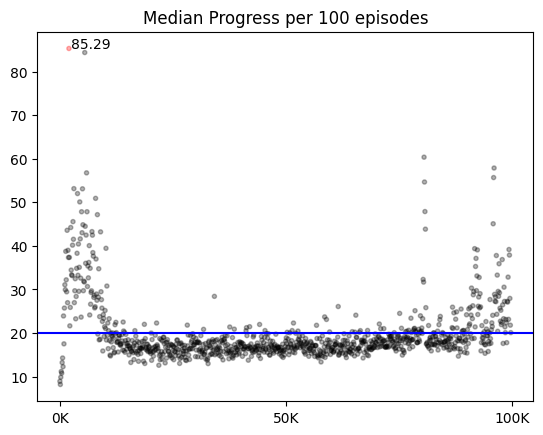

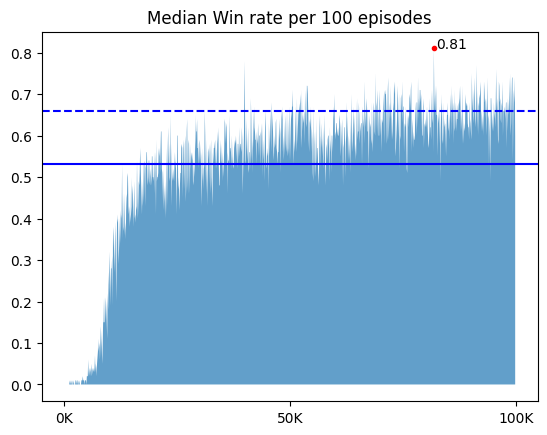

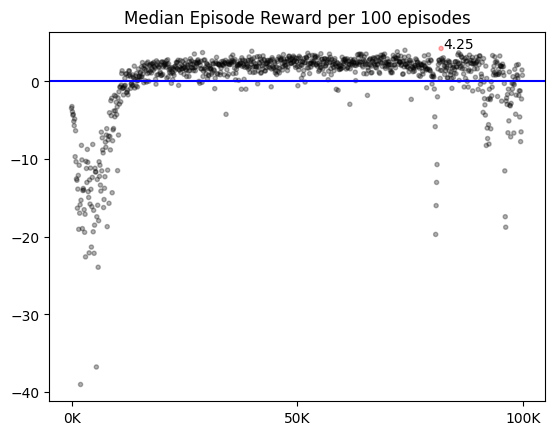

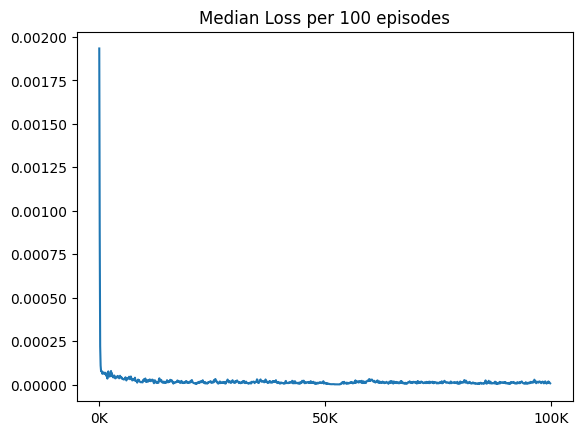

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/NoGuess'는 이미 존재합니다.
모델이 저장되었습니다.


In [13]:
train.train()
train.visualize_train()
train.save_model()

Episode: [50000/100], Median progress: 17.00, Median reward: 4.60, Win rate : 0.69, Epsilon: 0.01
Episode: [50000/200], Median progress: 18.00, Median reward: 4.00, Win rate : 0.72, Epsilon: 0.01
Episode: [50000/300], Median progress: 18.00, Median reward: 4.15, Win rate : 0.68, Epsilon: 0.01
Episode: [50000/400], Median progress: 17.00, Median reward: 3.40, Win rate : 0.63, Epsilon: 0.01
Episode: [50000/500], Median progress: 15.50, Median reward: 4.00, Win rate : 0.64, Epsilon: 0.01
Episode: [50000/600], Median progress: 17.00, Median reward: 4.15, Win rate : 0.72, Epsilon: 0.01
Episode: [50000/700], Median progress: 17.00, Median reward: 3.85, Win rate : 0.64, Epsilon: 0.01
Episode: [50000/800], Median progress: 17.00, Median reward: 3.75, Win rate : 0.69, Epsilon: 0.01
Episode: [50000/900], Median progress: 16.50, Median reward: 3.55, Win rate : 0.63, Epsilon: 0.01
Episode: [50000/1000], Median progress: 14.00, Median reward: 2.60, Win rate : 0.53, Epsilon: 0.01
Episode: [50000/110

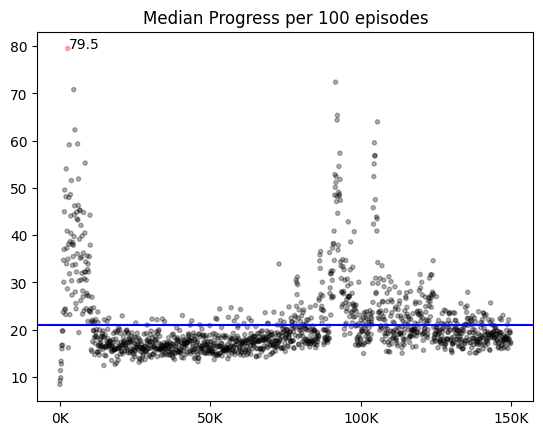

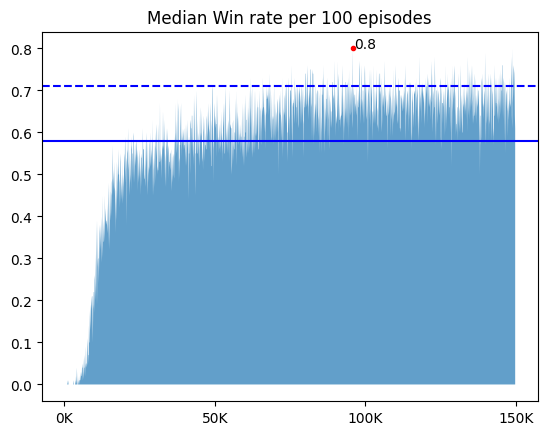

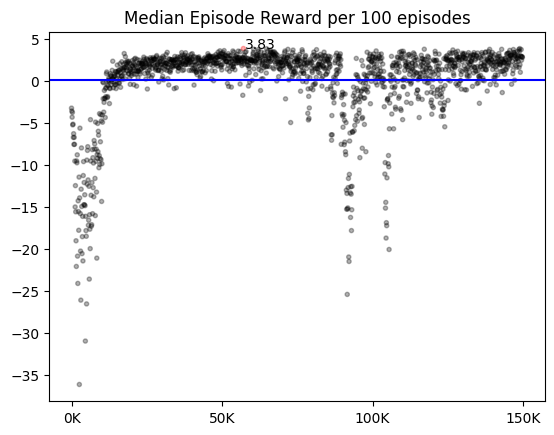

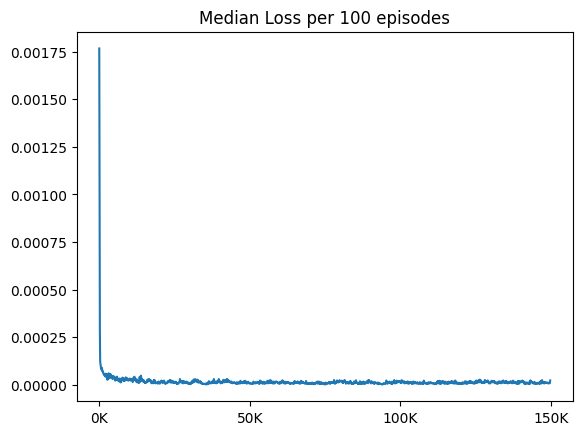

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/noRewardsWithValidShutDown_5'는 이미 존재합니다.
모델이 저장되었습니다.


In [18]:
train.train()
train.visualize_train()
train.save_model()

In [ ]:
train.save_model()

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/basicModelWithBiasAndRule'는 이미 존재합니다.


# 03 Test

In [1]:
import numpy as np

In [4]:
arr = [1,2,3,4,5,4]
np.argmax(arr)

4